There are two major types of supervised machine learning problems, called **classification** and **regression**

In classification, the goal is to **predict a class label**, which is a choice from a predefined
list of possibilities. Classification is sometimes separated into binary classification,
which is the special case of distinguishing between exactly two classes, and multiclass
classification, which is classification between more than two classes.

For regression tasks, the goal is to predict a **continuous number**, or a floating-point number in programming terms

If a model is able to make accurate predictions on unseen data, we say it is able to **generalize** from the training set to the test set.

The only measure of whether an algorithm will perform well on new data is the **evaluation** on the test set.

Building a model that is too complex for the amount of information we have, as our novice data scientist did, is called **overfitting**. Overfitting occurs when you fit a model too closely to the particularities of the training set and obtain a model that works well on the training set but is not able to generalize to new data.

Choosing too simple a model is called **underfitting**.



## Sample Models

In [7]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

X.shape: (26, 2)


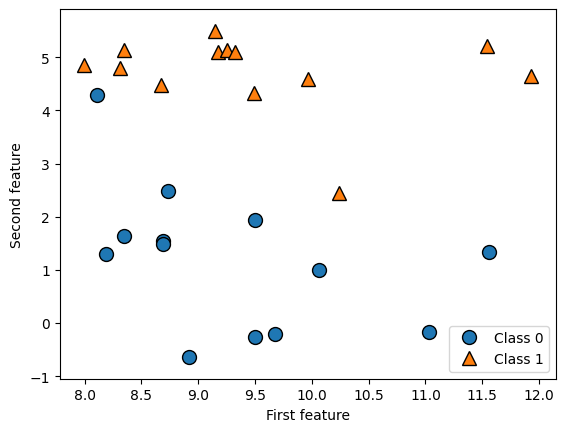

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

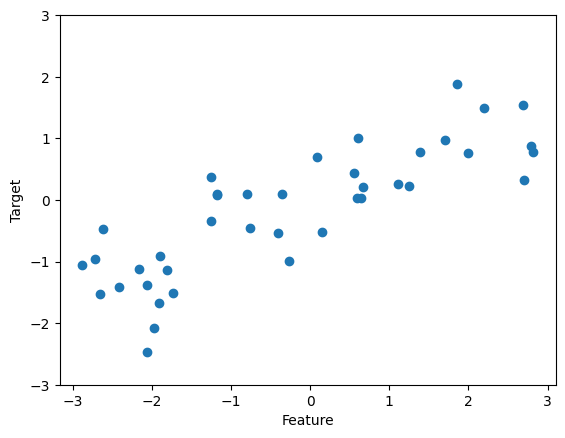

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**Wisconsin Breast Cancer** dataset (cancer,
for short), which records clinical measurements of breast cancer tumors. Each tumor
is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors),
and the task is to learn to **predict whether a tumor is malignant based on the measurements of the tissue**

In [6]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))


X.shape: (506, 104)


## Uncertainty

There are two different functions in scikit-learn that can be used to obtain uncertainty
estimates from classifiers: **decision_function and predict_proba.** Most (but
not all) classifiers have at least one of them, and many classifiers have both.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)
# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### Decision Function

In the binary classification case, the return value of decision_function is of shape
(n_samples,), and it returns **one floating-point number for each sample**:

This value encodes how strongly the model believes a data point to belong to the
“positive” class, in this case class 1. Positive values indicate a preference for the positive
class, and negative values indicate a preference for the “negative” (other) class

In [9]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [10]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [11]:
print("Thresholded decision function:\n{}".format(
gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


For binary classification, the “negative” class is always the first entry of the classes_
attribute, and the “positive” class is the second entry of classes_.

The range of decision_function can be arbitrary, and depends on the data and the
model parameters:

In [12]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(
np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [13]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


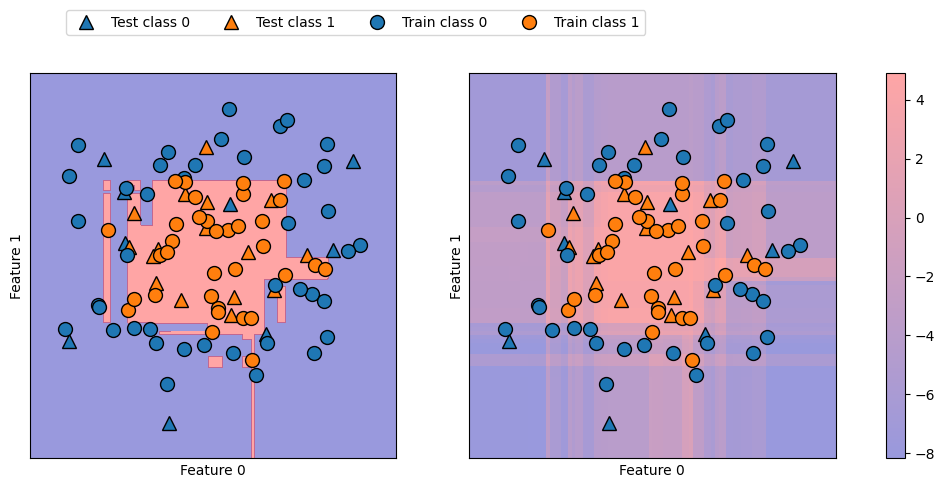

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
    markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
    markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
"Train class 1"], ncol=4, loc=(.1, 1.1))

### Predicting Probabilities

The output of predict_proba is a **probability** for each class, and is often more easily
understood than the output of decision_function. It is always of shape (n_samples,2) for binary classification:

The first entry in each row is the **estimated probability** of the first class, and the second
entry is the estimated probability of the second class. Because it is a probability,
the output of predict_proba is **always between 0 and 1**, and the sum of the entries
for both classes is always 1:

In [15]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [16]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


A model that is more overfitted tends to make **more certain predictions,** even if they might be wrong. A model with less complexity usually
has more uncertainty in its predictions. 

A model is called **calibrated** if the
reported uncertainty actually matches how correct it is—in a calibrated model, a prediction
made with 70% certainty would be correct 70% of the time.

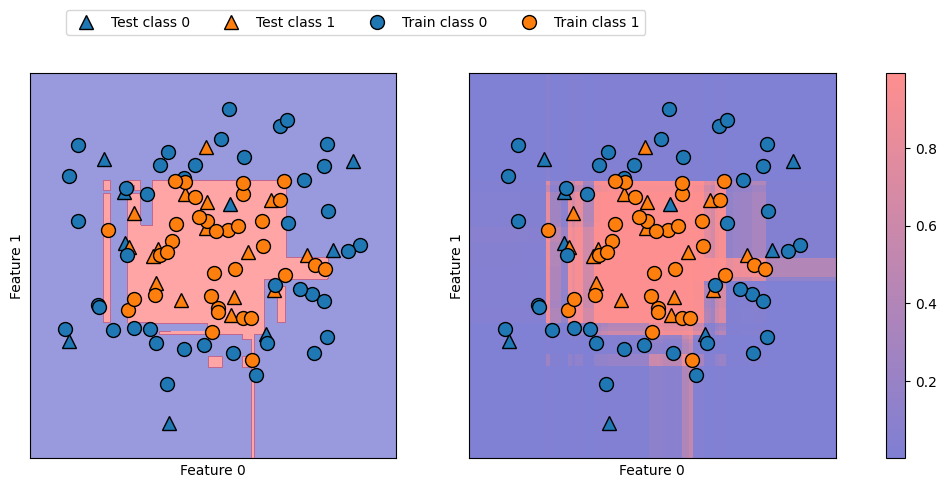

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(
gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
    markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
    markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
"Train class 1"], ncol=4, loc=(.1, 1.1))

### Multiclass Classification

The **decision_function and predict_proba** methods also work in the **multiclass setting.**

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [19]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]


In the multiclass case, the decision_function has the shape **(n_samples, n_classes)** and each column provides a “certainty score” for each class, where a large
score means that a class is more likely and a small score means the class is less likely.
You can recover the predictions from these scores by finding the maximum entry for
each data point:

In [20]:
print("Argmax of decision function:\n{}".format(
np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


The output of predict_proba has the same shape, (n_samples, n_classes). Again,
the probabilities for the possible classes for each data point sum to 1:

In [21]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))
print("Argmax of predicted probabilities:\n{}".format(
np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]
Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


### Decision Metrics

For **binary classification**, we often speak of a **positive class and a negative class**, with
the understanding that the positive class is the one we are looking for.

Often, accuracy is not a good measure of predictive performance, as the number of
mistakes we make does not contain all the information we are interested in

An incorrect positive prediction is called a **false positive**.

An incorrect negative prediction is called a **false negative**. 

Types of errors play an important role when one of two classes is much more frequent than the other one. Datasets in which one class is much more frequent than the other are often called **imbalanced datasets**, or datasets with imbalanced classes. In reality, imbalanced data is the norm,
and it is rare that the events of interest have equal or even similar frequency in the
data.

One of the most comprehensive ways to represent the result of evaluating binary clas‐
sification is using **confusion matrices**

The output of confusion_matrix is a two-by-two array, where the rows correspond
to the true classes and the columns correspond to the predicted classes. Each entry
counts how often a sample that belongs to the class corresponding to the row (here,
“not nine” and “nine”) was classified as the class corresponding to the column

In [1]:
mglearn.plots.plot_binary_confusion_matrix()

NameError: name 'mglearn' is not defined

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
In other words, accuracy is the number of correct predictions (TP and TN) divided
by the number of all samples (all entries of the confusion matrix summed up).

$$
\text{Precision} = \frac{TP }{TP + FP}
$$
Precision is used as a performance metric when the goal is to **limit the number of false positives.**

$$
\text{Recall} = \frac{TP }{TP + FN}
$$

**Recall**, on the other hand, measures **how many of the positive samples are captured by the positive predictions**:
Recall is used as performance metric when we need to identify all positive samples; that is, when it is important to **avoid false negatives**

So, while precision and recall are very important measures, looking at only one of them will not provide you with the full picture. One way to summarize them is the
**f-score** or f-measure, which is with the harmonic mean of precision and recall:

$$
\text{F} = \frac{precision*recall }{precision + recall}
$$

look at all possible thresholds, or all possible trade-offs of precision and recalls at
once. This is possible using a tool called the **precision-recall curve**.

There is another tool that is commonly used to analyze the behavior of classifiers at
different thresholds: the receiver operating characteristics curve, or **ROC curve** for
short. Similar to the precision-recall curve, the ROC curve considers all possible thresholds for a given classifier, but instead of reporting precision and recall, it shows the **false positive rate (FPR) against the true positive rate (TPR)**

$$
\text{FPR} = \frac{TP }{TP + TN}
$$

For the ROC curve, the ideal curve is close to the top left: you want a classifier that produces a high recall while keeping a low false positive rate.

The **AUC** can be interpreted as **evaluating the ranking of positive samples**. It’s equivalent to the probability that a randomly picked point of the positive class will have a higher score according to the classifier than a randomly picked point from the negative class. So, a perfect AUC of 1 means that all positive points have a higher score than all negative points. For classification problems with imbalanced classes, using AUC for model selection is often much more meaningful than using accuracy

Basically, all metrics for multiclass classification are derived from binary classification metrics, but averaged over all classes. Accuracy for multiclass classification is again defined as the fraction
of correctly classified examples

The most commonly used metric for imbalanced datasets in the multiclass setting is
the **multiclass version of the f-score.** The idea behind the multiclass f-score is to **compute one binary f-score per class**, with that class being the positive class and the other classes making up the negative classes. Then, these per-class f-scores are averaged using one of the following strategies:

• **"macro"** averaging computes the unweighted per-class f-scores. This gives equal
weight to all classes, no matter what their size is.

• **"weighted"** averaging computes the mean of the per-class f-scores, weighted by
their support. This is what is reported in the classification report.

• **"micro"** averaging computes the total number of false positives, false negatives,
and true positives over all classes, and then computes precision, recall, and fscore using these counts

**For Regression, using R² is enough**

## SUMMARY 

We started this chapter with a discussion of model complexity, then discussed **generalization,**
or learning a model that is able to **perform well on new, previously unseen data.** 

This led us to the concepts of **underfitting**, which describes a model that cannot capture the variations present in the training data, and **overfitting**, which describes a model that focuses too much on the training data and is not able to generalize to new
data very well.

We then discussed a wide array of machine learning models for classification and
regression, what their advantages and disadvantages are, and how to control model
complexity for each of them. We saw that for many of the algorithms, **setting the right parameters** is important for good performance. Some of the algorithms are also sensitive
to how we represent the input data, and in particular to how the features are
**scaled**. Therefore, blindly applying an algorithm to a dataset without understanding
the assumptions the model makes and the meanings of the parameter settings will
rarely lead to an accurate model.

**Nearest neighbors**:
For small datasets, good as a baseline, easy to explain.

**Linear models**
Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional
data.

**Naive Bayes**
Only for classification. Even faster than linear models, good for very large datasets
and high-dimensional data. Often less accurate than linear models.

**Decision trees**
Very fast, don’t need scaling of the data, can be visualized and easily explained.
Random forests
Nearly always perform better than a single decision tree, very robust and powerful.
Don’t need scaling of data. Not good for very high-dimensional sparse data.

**Gradient boosted decision trees**
Often slightly more accurate than random forests. Slower to train but faster to
predict than random forests, and smaller in memory. Need more parameter tuning
than random forests.

**Support vector machines**
Powerful for medium-sized datasets of features with similar meaning. Require
scaling of data, sensitive to parameters.

**Neural networks**
Can build very complex models, particularly for large datasets. Sensitive to scaling
of the data and to the choice of parameters. Large models need a long time to
train.

When working with a new dataset, it is in general a good idea to **start with a simple model**, such as a linear model or a naive Bayes or nearest neighbors classifier, and see
how far you can get. After understanding more about the data, you can consider
moving to an algorithm that can build more complex models, such as random forests,
gradient boosted decision trees, SVMs, or neural networks.